<a href="https://colab.research.google.com/github/saloni1901/machine_learning_basics/blob/main/Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set_theme(color_codes=True)

In [4]:
data=pd.read_csv('Salary_Data.csv')
data.head(8)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0


In [28]:
data.shape

(30, 2)

In [29]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [31]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


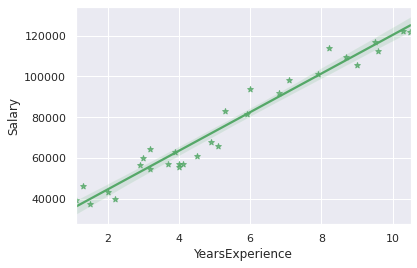

In [14]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'],scatter=True,color='g',marker='*')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


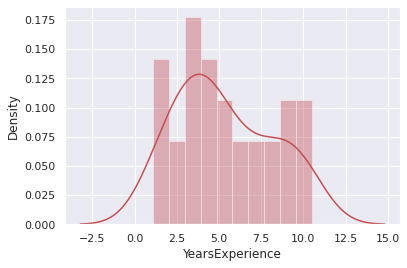

In [25]:
sns.distplot(data['YearsExperience'],bins=10,color='r')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


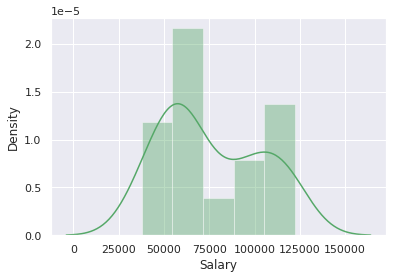

In [27]:
sns.distplot(data['Salary'],bins=5,color='g')

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge,Lasso


In [42]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [43]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [45]:
print(X_train.shape,X_test.shape)

(20, 1) (10, 1)


In [46]:
model1=LinearRegression()
model1.fit(X_train,y_train)
p1=model1.predict(X_test)
t=pd.DataFrame(p1)

In [47]:
model1.score(X_train,y_train)

0.9606045103524844

In [50]:
model1.score(X_train,y_train)

0.9606045103524844

In [53]:
print("model_cofficient: {}".format(model1.coef_))
print("model_itercept: {}".format(model1.intercept_))

model_cofficient: [9301.96903645]
model_itercept: 28715.33943379148


In [60]:
model2=Ridge(alpha=.5)
model2.fit(X_train,y_train)
p2=model2.predict(X_test)
model2.score(X_train,y_train)

0.9605930359344184

In [61]:
print("model_cofficient: {}".format(model2.coef_))
print("model_itercept: {}".format(model2.intercept_))

model_cofficient: [9269.82000353]
model_itercept: 28901.643079571026


In [72]:
model3=SVR(kernel='linear',degree=1,C=1.0,gamma='scale')
model3.fit(X_train,y_train)
p3=model3.predict(X_test)
model3.score(X_train,y_train)
#gamma{‘scale’, ‘auto’} or float, default=’scale’
#Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
#if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
#if ‘auto’, uses 1 / n_features
#C:float, default=1.0
#Regularization parameter. The strength of the regularization is
#inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

0.008980551127219072

In [73]:
print("model_cofficient: {}".format(model3.coef_))
print("model_itercept: {}".format(model3.intercept_))

model_cofficient: [[44.7]]
model_itercept: [81975.17999721]


In [75]:
model4=Lasso(alpha=.5)
model4.fit(X_train,y_train)
p4=model4.predict(X_test)
model4.score(X_train,y_train)

0.9606045102990712

In [76]:
print("model_cofficient: {}".format(model4.coef_))
print("model_itercept: {}".format(model4.intercept_))

model_cofficient: [9301.89967365]
model_itercept: 28715.741391209653


In [77]:
model5=DecisionTreeRegressor(max_depth=5)
model5.fit(X_train,y_train)
p5=model5.predict(X_test)
model5.score(X_train,y_train)

0.9955949122008565

In [80]:
model6=DecisionTreeRegressor()
model6.fit(X_train,y_train)
p6=model6.predict(X_test)
model6.score(X_train,y_train)

0.9961497276151398

In [82]:
t=pd.DataFrame({'acctual':y_test,"model1_lr":p1,"model2_rig":p2,"model3_svr":p3,"model4_laso":p4,"model5_des":p5,"model6_ran":p6})
t

,acctual,model1_lr,model2_rig,model3_svr,model4_laso,model5_des,model6_ran
0,39343.0,38947.505374,39098.445083,82024.349997,38947.831032,46205.0,46205.0
1,39891.0,49179.671314,49295.247087,82073.519997,49179.920673,43525.0,43525.0
2,55794.0,65923.215580,65980.923094,82153.979997,65923.340086,63218.0,63218.0
3,56642.0,55691.049639,55784.121090,82104.809997,55691.250445,60150.0,60150.0
4,112635.0,118014.242184,117891.915113,82404.299997,118013.978258,116969.0,116969.0
5,56957.0,65923.215580,65980.923094,82153.979997,65923.340086,63218.0,63218.0
6,105582.0,112433.060762,112330.023111,82377.479997,112432.838454,109431.0,109431.0
7,37731.0,42668.292988,42806.373085,82042.229997,42668.590902,46205.0,46205.0
8,66029.0,76155.381520,76177.725098,82203.149997,76155.429727,67938.0,67938.0
9,57081.0,66853.412483,66907.905094,82158.449997,66853.530053,63218.0,63218.0
